In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import sounddevice as sd
import scipy.signal

In [3]:
!ls data

Engl 412 St 2a.wav	       src-gammel1.wav
Engl 412 St 2b.wav	       src-gammel2.wav
goal.wav		       src.wav
Greek 7 Echo Hall-gammel1.wav  target.wav
Greek 7 Echo Hall.wav	       target_w_reverb.wav
Marshall Heritage G12H 2a.wav  TN Mar412-V30 Blend 1-gammel1.wav
MONO-000.WAV		       TN Mar412-V30 Blend 1.wav


In [77]:
from irloader.irloader import IRLoader
iii = IRLoader(ir="data/Engl 412 St 2b.wav", source="data/src.wav", target="data/target.wav")
iii.read()
iii.process()
iii.write()

data/src.wav 1 <class 'numpy.float32'>
96000 [0.2117651  0.27082178 0.23652962 ... 0.04813553 0.03844989 0.02019637]
data/Engl 412 St 2b.wav 1 <class 'numpy.float32'>
96000 [-1.6077624e-03  2.8567177e-03 -4.8085335e-03 ...  9.3719300e-06
  6.9175398e-06  1.3279757e-05]


In [109]:
sample, fs = sf.read("data/goal.wav")

In [110]:
x = sample[2**15:2**17]
sd.play(x, samplerate=fs)

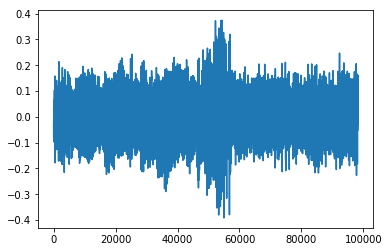

In [111]:
plt.plot(x)
#plt.xlim(0, 10000)
#plt.ylim(-0.01, 0.01)

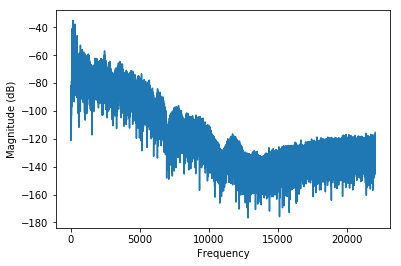

In [112]:
plt.magnitude_spectrum(x, fs, scale='dB')[2]
#plt.xlim(0, 10000)

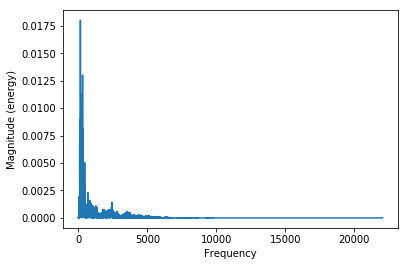

In [113]:
p=plt.magnitude_spectrum(x, fs)[2]
#plt.xlim(0, 10000)
#plt.ylim(0, 0.002)

(0, 0.0001)

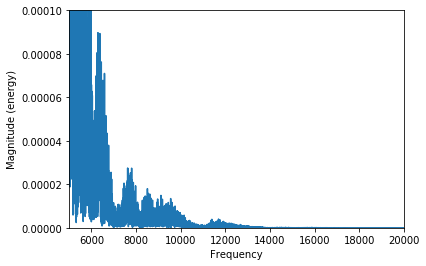

In [107]:
p=plt.magnitude_spectrum(x, fs)[2]
plt.xlim(5000, 20000)
plt.ylim(0, 0.0001)

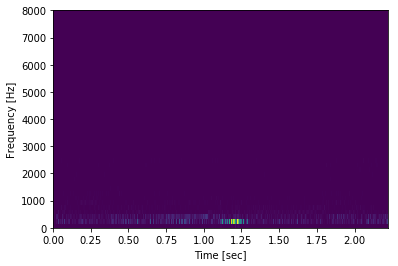

In [114]:
f, t, Sxx = scipy.signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 8000)
plt.show()